time for sim =  1.972062110900879 s


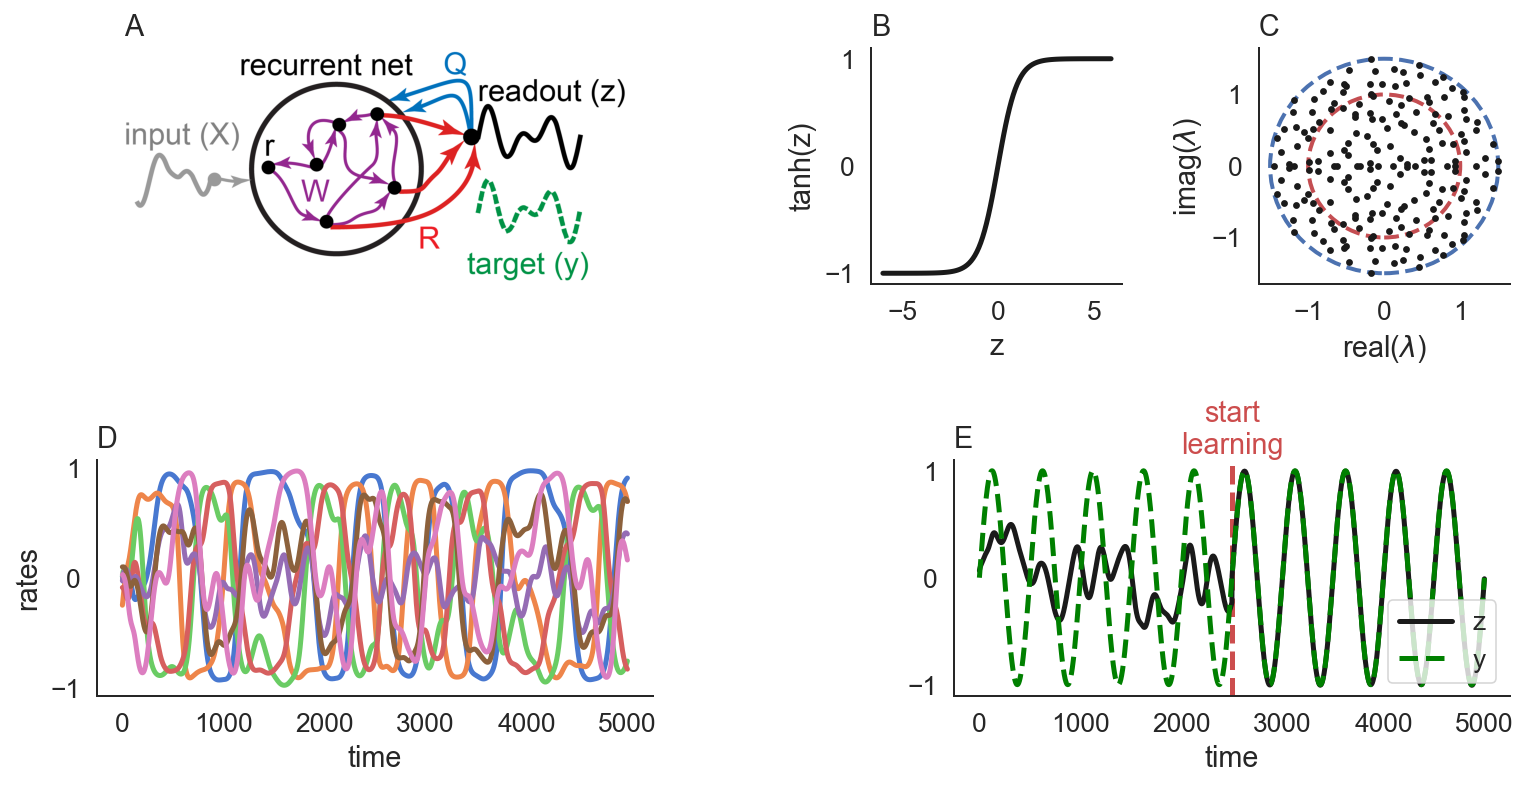

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

# For computing runtimes
from time import time as tm

# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(6)

# Discretized time
T=5000
dt=.1
time=np.arange(0,T,dt)

# Spectral radius
rho=1.5

# Number of neurons
N=200

# Timescale
tau=20

# Learning rate
epsilon=.005

# Define W
W=rho*np.random.randn(N,N)/np.sqrt(N)

# When to start training weights
StartLearning=T/2.0

# External input (zero for now)
X=np.zeros((N,len(time)))

# Readout dimension. This will be 1 for
# our example, but can be larger
M=1

# Target 
y=np.zeros((M,len(time)))
y[0,:]=np.sin(2*np.pi*time/500)

# Readout matrix
R=np.random.randn(M,N)/np.sqrt(N)

# Feedback matrix
Q=np.random.randn(N,M)/np.sqrt(M)


# Compute eigenvalues of W
lam,_=np.linalg.eig(W)

# Initialize r and z. 
# We should not initialize to 0 
# because 0 is a fixed point. 
r=.1*np.random.randn(N,len(time))
z=np.zeros((M,len(time)))
z[:,0]=R@r[:,0]

# Euler loop
feedback=0
t0=tm()
for i in range(len(time)-1):

    # Compute feedback if we are in the learning phase    
    if i*dt>=StartLearning:
        feedback=Q@z[:,i+1]
    else:
        feedback=0
    
    # Euler update to r
    r[:,i+1]=r[:,i]+dt*(-r[:,i]+np.tanh(W@r[:,i]+X[:,i]+feedback))/tau
    
    # Compute readout
    z[:,i+1]=R@r[:,i+1]
    
    # Update weights if we are in the learning phase
    if i*dt>=StartLearning:
        R=R-epsilon*np.outer(z[:,i+1]-y[:,i+1],r[:,i+1].T)

print('time for sim = ',tm()-t0,'s')    
        
        
# Make figure
plt.subplots(figsize=(11,5.7))

plt.subplot(2,2,1)
# Get image for plot
try: 
    im = plt.imread('./ImageFiles/RNNdiagram.png')
except:
    try:
        url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/RNNdiagram.png"
        file = np.DataSource().open(url)
        im = plt.imread(file.name)
    except:
        im = 1.0+np.zeros([100,100,3],dtype=np.uint8)
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')
sns.despine()     

# Plot tanh
plt.subplot(2,4,3)
zplot=np.arange(-6,6,.1)
plt.plot(zplot,np.tanh(zplot),'k')
plt.ylabel('tanh(z)')
plt.xlabel('z')
plt.title('B',loc='left')
sns.despine()

# Plot eigenvalues 
plt.subplot(2,4,4)
plt.plot(np.real(lam),np.imag(lam),'k.')
#plt.axvline(x=0,color='r')
circle1=plt.Circle((0, 0), 1, color='r',linestyle='dashed',fill=False,linewidth=2)
circle2=plt.Circle((0, 0), rho, color='b',linestyle='dashed',fill=False,linewidth=2)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
#plt.xlim(-2.5,2.5)
plt.xlabel(r'real($\lambda$)')
plt.ylabel(r'imag($\lambda$)')
plt.title('C',loc='left')
sns.despine()




plt.subplot(2,2,3)
plt.plot(time,r[:7,:].T)
plt.xlabel('time')
plt.ylabel('rates')
plt.title('D',loc='left')
sns.despine()


plt.subplot(2,2,4)
plt.axvline(StartLearning,color=[.8,.3,.3],ls='--')
plt.text(StartLearning,1.1,'start\nlearning',ha='center',va='bottom',color=[.8,.3,.3])
plt.plot(time,z.T,'k',label='z')
plt.plot(time,y.T,'--',color='green',label='y')
plt.xlabel('time')
plt.legend(loc='lower right')
plt.title('E',loc='left')
sns.despine()


plt.tight_layout()

